# Exploring bike sharing dataset

In [1]:
#Importing required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [2]:
#Loading the data
bikes_hour = pd.read_csv('hour.csv')
bikes_day = pd.read_csv('day.csv')

In [3]:
bikes_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bikes_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
bikes_day_df=pd.DataFrame(data=bikes_day)
bikes_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
bikes_hour_df=pd.DataFrame(data=bikes_hour)
bikes_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
# removing useless feature
bikes_hour_df = bikes_hour.drop(['casual' , 'registered'], axis=1)

In [8]:
bikes_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [9]:
#lets get information about features
bikes_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


In [10]:
bikes_hour_df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

# Quantitative Features vs. Rental Counts

Text(0, 0.5, 'Count of all Biks Rented')

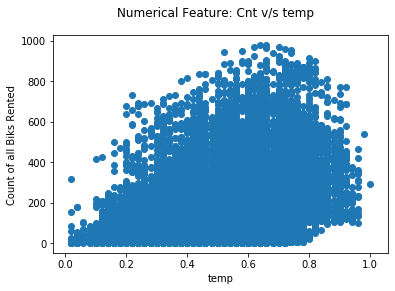

In [11]:
plt.scatter(bikes_hour_df['temp'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

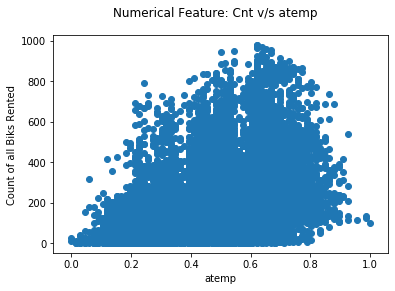

In [12]:
plt.scatter(bikes_hour_df['atemp'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

as we can see both the feature 'temp' and 'atemp' have similar distribution and may present redundancy and even multicollinearity. 
To keep things clean we can drop the 'atemp' feature

In [13]:
bikes_hour_df = bikes_hour.drop(['atemp'], axis=1)
bikes_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1


Text(0, 0.5, 'Count of all Biks Rented')

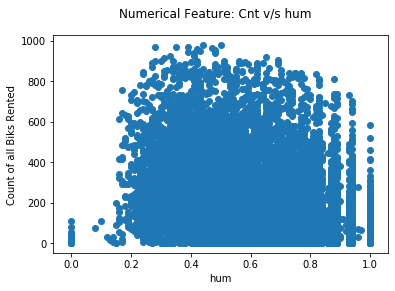

In [14]:
plt.scatter(bikes_hour_df['hum'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

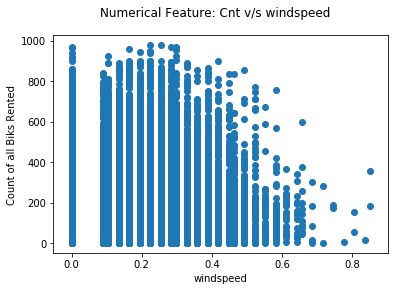

In [15]:
plt.scatter(bikes_hour_df['windspeed'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

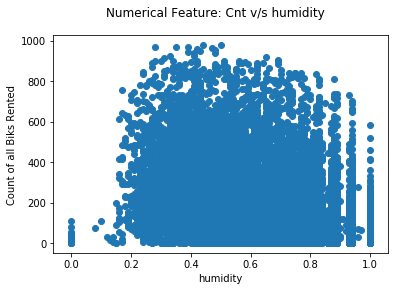

In [16]:
plt.scatter(bikes_hour_df['hum'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s humidity')
plt.xlabel('humidity')
plt.ylabel('Count of all Biks Rented')

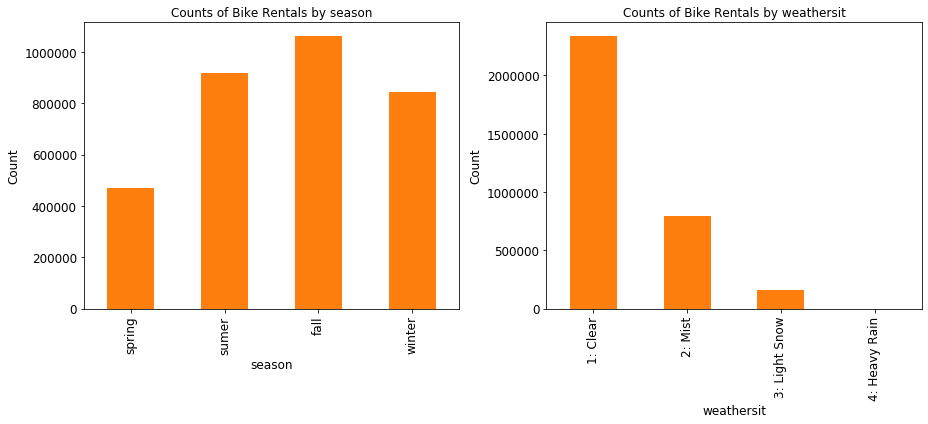

In [17]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = bikes_hour_df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
      legend = False, title ="Counts of Bike Rentals by season",stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = bikes_hour_df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

the above graph of 'weathersit' shows that people tends to rent more bike in clear weather. 
season shows the fall is the top season to rent bike.

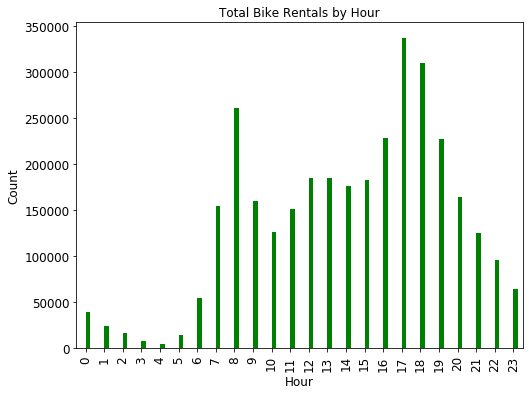

In [18]:
ax = bikes_hour_df[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
     legend = False, title ="Total Bike Rentals by Hour",color='green', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

the feature 'hr' or we can say rental hours, clear shows peak office commute hours and afternoon rides are very popular bike time.

In [19]:
#Dealing with outliers
print("Samples in train set with outliers: {}".format(len(bikes_hour_df)))
q1 = bikes_hour_df.cnt.quantile(0.25)
q3 = bikes_hour_df.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
bikes_hour_df_preprocessed = bikes_hour_df.loc[(bikes_hour_df.cnt >= lower_bound) & (bikes_hour_df.cnt <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(bikes_hour_df_preprocessed)))

Samples in train set with outliers: 17379
Samples in train set without outliers: 16874


In [29]:
bikes_hour_df['dteday'] = pd.to_datetime(bikes_hour_df['dteday'])
bikes_hour_df.info()
bikes_day_df['dteday'] = pd.to_datetime(bikes_day_df['dteday'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
instant       17379 non-null int64
dteday        17379 non-null datetime64[ns]
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 2.1 MB


In [48]:
#from dates we can get monthly,daily and yearly average counts of bikes.
df_bikes_dates=pd.DataFrame()
df_bikes_dates['month']=bikes_day_df['dteday'].dt.month_name()
df_bikes_dates['year']=bikes_day_df['dteday'].dt.year
df_bikes_dates['day']=bikes_day_df['dteday'].dt.day_name()
df_bikes_dates['count']=bikes_day_df['cnt']
df_bikes_dates.head()

,month,year,day,count
0,January,2011,Saturday,985
1,January,2011,Sunday,801
2,January,2011,Monday,1349
3,January,2011,Tuesday,1562
4,January,2011,Wednesday,1600


In [32]:
#Checking the total number of distinct years
df_bikes_dates['year'].drop_duplicates()

0      2011
365    2012
Name: year, dtype: int64

In [54]:
#Making one more column which tells wheather it is weekday or weekend
import numpy as np
df_bikes_dates['types_of_day']=np.where((df_bikes_dates['day']=='Sunday')|(df_bikes_dates['day']=='Saturday'),'weekend','weekday')

In [55]:
df_bikes_dates.head()

,month,year,day,count,types_of_day
0,January,2011,Saturday,985,weekend
1,January,2011,Sunday,801,weekend
2,January,2011,Monday,1349,weekday
3,January,2011,Tuesday,1562,weekday
4,January,2011,Wednesday,1600,weekday


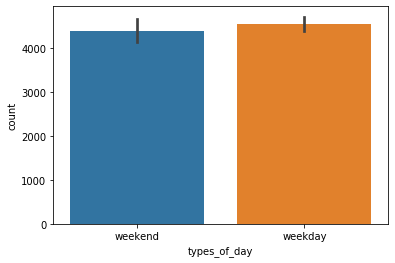

In [57]:
#Lets make the barplot for average count during weekend and weekdays
sns.barplot(x='types_of_day',y='count',data=df_bikes_dates)
plt.show()

from this we came to know, during weekends average count is more

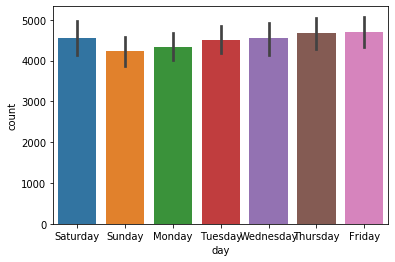

In [58]:
#Average counts during days of week
sns.barplot(x='day',y='count',data=df_bikes_dates)
plt.show()

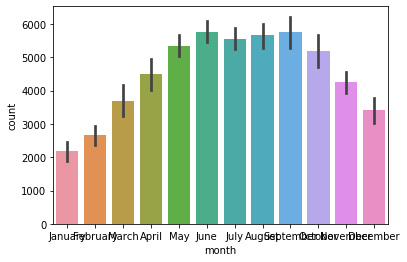

In [59]:
#Average counts during months of an year
sns.barplot(x='month',y='count',data=df_bikes_dates)
plt.show()

It shows the average count is increasing from January to June

In [60]:
#Seperating into input and output variables
df_x=bikes_day_df.drop(columns=['cnt','dteday'])
y=pd.DataFrame(bikes_day_df['cnt'])

In [62]:
#Scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [70]:
#To check the best r state in Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score=0
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state, test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print('r2_score corresponding to random state:',r_state, 'is:',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to', final_r_state, 'is', max_r_score)

r2_score corresponding to random state: 42 is: 1.0
r2_score corresponding to random state: 43 is: 1.0
r2_score corresponding to random state: 44 is: 1.0
r2_score corresponding to random state: 45 is: 1.0
r2_score corresponding to random state: 46 is: 1.0
r2_score corresponding to random state: 47 is: 1.0
r2_score corresponding to random state: 48 is: 1.0
r2_score corresponding to random state: 49 is: 1.0
r2_score corresponding to random state: 50 is: 1.0
r2_score corresponding to random state: 51 is: 1.0
r2_score corresponding to random state: 52 is: 1.0
r2_score corresponding to random state: 53 is: 1.0
r2_score corresponding to random state: 54 is: 1.0
r2_score corresponding to random state: 55 is: 1.0
r2_score corresponding to random state: 56 is: 1.0
r2_score corresponding to random state: 57 is: 1.0
r2_score corresponding to random state: 58 is: 1.0
r2_score corresponding to random state: 59 is: 1.0
r2_score corresponding to random state: 60 is: 1.0
r2_score corresponding to rando

In [71]:
#Lets use cross_val_score function to check above is overfitting or not
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2')
a_score

array([1., 1., 1., 1., 1.])

In [72]:
#Lets make our final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

In [73]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score:',r2_score(y_test,y_pred))

RMSE is: 1.2399997322254342e-12
r2_score: 1.0


In [75]:
#Bagging
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=200,random_state=45)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))

pred=rf.predict(x_test)
pred

0.9993674736318692


array([6661.67 , 1544.315, 3723.155, 6059.28 , 7614.655, 7358.565,
       1626.495, 2194.895, 7504.49 , 5860.96 , 1769.755, 3120.76 ,
       4894.93 , 5388.405, 2178.695, 2299.095, 2130.23 , 7852.43 ,
       5391.63 , 2317.64 , 7491.475, 5553.52 , 5334.685, 1914.555,
       1871.98 , 5146.125, 2142.165, 7475.555, 3947.115, 5584.82 ,
       2792.8  , 3623.715, 6229.965, 7476.135, 5897.275, 3392.225,
       7523.17 , 6030.895, 2671.47 , 1369.33 , 3908.745, 4031.005,
       7452.37 , 4943.31 , 6897.505,  703.46 , 4442.925, 5353.96 ,
       6055.92 , 4914.74 , 3099.925, 2434.955, 1026.66 , 4478.73 ,
       4734.965, 4738.685, 2428.085, 3238.92 , 4764.9  , 7000.65 ,
       6178.32 , 7460.24 , 1508.56 , 7769.74 , 6665.8  , 6284.795,
       7343.145, 4267.485, 2077.31 , 7024.18 , 3136.13 , 1292.505,
       3808.81 , 4601.675, 4384.17 , 2171.055, 5603.165, 4763.445,
       1470.06 , 4390.115, 2104.205, 2007.015, 5637.075,  578.8  ,
       4076.985, 4088.055, 5454.405, 1213.77 , 3643.395, 3391.

In [76]:
#Adaboost
from sklearn.ensemble import AdaBoostRegressor

ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
print(ab.score(x_train,y_train))

pred=ab.predict(x_test)
pred

0.9812960269301574


array([6705.87142857, 1875.14285714, 4033.71      , 6217.17131474,
       7191.72058824, 7196.87671233, 2027.78666667, 2402.84090909,
       7629.72      , 5998.7852349 , 2018.01818182, 3284.10843373,
       4885.59459459, 5797.83333333, 2382.5       , 2481.42372881,
       2298.22641509, 7759.35714286, 4999.77027027, 2469.08196721,
       7226.07865169, 5683.78358209, 5838.23595506, 2248.56923077,
       2271.26      , 4913.40860215, 2402.84090909, 7201.94904459,
       4394.09223301, 5797.83333333, 3186.92380952, 3810.78333333,
       6307.35545024, 7226.07865169, 6121.78512397, 3660.75384615,
       7226.07865169, 5843.04761905, 3203.51515152, 1519.10204082,
       4243.67567568, 4394.09223301, 7226.07865169, 4697.65217391,
       7112.43678161, 1223.32608696, 4654.99038462, 5444.90052356,
       5843.04761905, 4789.9375    , 3172.86666667, 2939.84210526,
       1260.2       , 4382.84848485, 4571.33870968, 4655.22033898,
       2501.60416667, 3362.8       , 4754.78947368, 7191.72058

In [77]:
#GradientBooster
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
print(gb.score(x_train,y_train))

pred=gb.predict(x_test)
pred

0.9989496253591384


array([6483.58044796, 1533.36653134, 3819.44485277, 6025.44541491,
       7609.9845753 , 7305.44350382, 1615.54760583, 2123.1084709 ,
       7605.92441105, 5859.69306817, 1709.84341981, 2955.20991062,
       4862.11015868, 5274.78661191, 2081.54924246, 2524.91170319,
       1961.78581508, 8102.66915983, 5173.29257287, 2282.12491157,
       7576.59746246, 5487.88682276, 5376.73802843, 1902.42154782,
       1816.66345844, 5076.89742409, 2153.83628282, 7464.98571415,
       3910.44192866, 5489.2284347 , 2814.46991567, 3662.5624483 ,
       6120.41943691, 7465.72335062, 5975.84194755, 3617.18093369,
       7419.00955037, 5995.65733902, 2669.7147369 , 1388.88690001,
       3986.91010604, 3996.88491025, 7414.51476108, 4967.09645702,
       6854.66473071,  769.86020342, 4513.61734991, 5303.12627008,
       5763.77641159, 4893.0381392 , 3139.40841506, 2461.1298983 ,
       1021.94490544, 4603.43198952, 4775.90643284, 4649.86737732,
       2311.50462405, 3417.04268159, 4873.57913829, 6999.25629

In [78]:
#Saving the Model
from sklearn.externals import joblib
joblib.dump(rf,'bike_sharing.pkl')

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['bike_sharing.pkl']